### Training a classifier

In [102]:
# importing packages
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt

In [6]:
mnist_data = fetch_openml("mnist_784")

In [10]:
X = mnist_data.data
y = mnist_data.target

In [26]:
X.head(5)
X.iloc[0,:] #all columns and zero row
X.iloc[:,0] #all rows and zero column
X.iloc[0,0] #value of row 0 and column 0

X.pixel356[X.pixel356 != 0] #shows values in pixel356 which are not zeros

2        254
5        252
7        252
9        226
13       253
        ... 
69992    254
69995    191
69996     79
69997     37
69999     13
Name: pixel356, Length: 34120, dtype: int64

In [34]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [38]:
#object LR
LR = LogisticRegression(max_iter=100)
LR.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
#prediction phase
y_pred = LR.predict(X_test)

In [42]:
#evaluation (confusion matrix)
confusion_matrix(y_test, y_pred)

array([[1289,    1,    6,    0,    5,   14,   12,    6,    8,    2],
       [   0, 1557,    5,    9,    2,    7,    0,    3,   15,    2],
       [   4,   20, 1229,   25,   16,    8,   19,   15,   35,    9],
       [   6,    7,   30, 1298,    1,   38,    4,   14,   19,   16],
       [   4,    0,    8,    5, 1194,    4,   13,    6,   12,   49],
       [   7,   11,    8,   53,   16, 1087,   20,    2,   54,   15],
       [   7,    3,   20,    0,   14,   14, 1332,    2,    4,    0],
       [   5,    4,   28,    4,    8,    5,    0, 1408,    2,   39],
       [  11,   24,   17,   38,    7,   39,   12,   10, 1186,   13],
       [   7,   10,    7,   14,   40,    5,    0,   45,   22, 1270]])

In [46]:
#evaluation (accuracy score)
accuracy_score(y_test, y_pred)

0.9178571428571428

In [50]:
#evaluation (f1 score)
f1_score(y_test, y_pred, average='macro')

0.9166119578810752

In [74]:
#converting dataframe values into numpy array
X_test_np = X_test.values

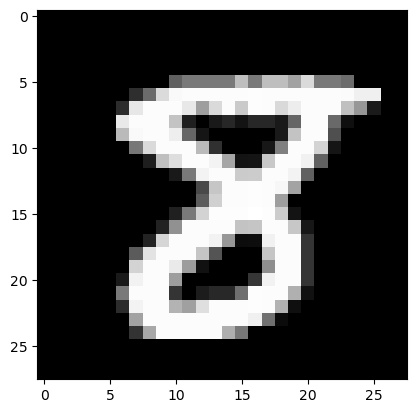

In [76]:
#plotting one of X_test
plt.imshow(X_test_np[0].reshape(28,28), cmap='gray')

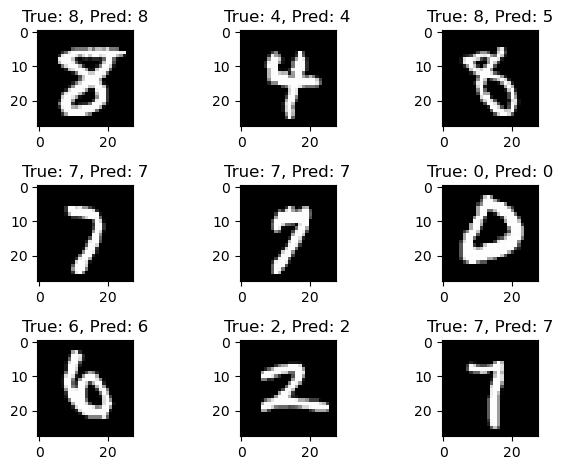

In [86]:
for i in range(9): 
    plt.subplot(331 + i)
    true_label = y_test[i]
    predicted_label = y_pred[i]
    plt.imshow(X_test_np[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_label}, Pred: {predicted_label}")
    
plt.tight_layout()    
plt.show()


In [92]:
#fitting svcto data
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [94]:
y_pred_SVC = LR.predict(X_test)

In [96]:
#evaluation (accuracy score)
accuracy_score(y_test, y_pred_SVC)

0.9178571428571428

In [98]:
#evaluation (f1 score)
f1_score(y_test, y_pred_SVC, average='macro')

0.9166119578810752

In [108]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [110]:
y_pred_RF = LR.predict(X_test)

In [112]:
#evaluation (accuracy score)
accuracy_score(y_test, y_pred_RF)

0.9178571428571428

In [114]:
#evaluation (f1 score)
f1_score(y_test, y_pred_RF, average='macro')

0.9166119578810752